In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display
import cv2

In [35]:
#ML
from skimage.io import imread,imshow
from skimage import measure,color,io,feature
from scipy import ndimage

In [46]:
#DL
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential,load_model
from keras.optimizers import Adam
import keras.utils
from keras.datasets import mnist
from keras import backend as K

% matplotlib inline

In [47]:
x=[]
y=[]
path='C:/Users/Bermuda/OneDrive/Workshop/Dataset'
for fname in os.listdir(path):
    print(fname,end=' ')
    paths=path+'/'+str(fname)
    for iname in os.listdir(paths):
        #print(iname,end=' ')
        pathss=paths+'/'+str(iname)
        img=imread(pathss)
        
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate1=ndimage.rotate(img,90)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate2=ndimage.rotate(img,180)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
        
        img_rotate3=ndimage.rotate(img,270)
        img_gray=color.rgb2gray(img)
        x.append(img_gray)
        y.append(fname)
x=np.array(x)
y=np.array(y)
print(x.shape)

0 1 2 3 4 5 6 7 8 9 (760, 100, 100)


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30, random_state=507)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(532, 100, 100)
(228, 100, 100)
(532,)


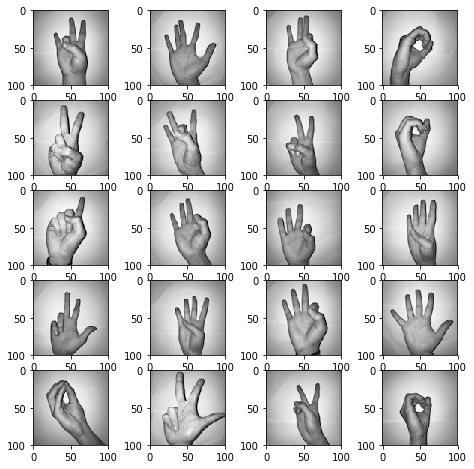

In [58]:
index = np.random.choice(x_train.shape[0], 21, replace=False)
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = x_train[index[i]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [59]:
num_classes = 10

x_train = x_train.reshape(532, 100, 100, 1)
x_test = x_test.reshape(228, 100, 100, 1)

# x_train /= 255  # normalize dataset
# x_test /= 255

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(y_train.shape)

532 train samples
228 test samples
(532, 10)


In [64]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(100, 100, 1))) #padding='same'ทำzero padding มาให้
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.save_weights('weights.h5py')

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 100, 100, 64)      640       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 12, 12, 256)       295168    
__________

In [62]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
print("epochs = 10 min_delta = 0.001 patience = 0")

model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.001,patience=0,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
# saves the weights of the model as a HDF5 file
model.save('my_model0.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

epochs = 10 min_delta = 0.01 patience = 2
Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 41s 96ms/step - loss: 2.2790 - acc: 0.1529 - val_loss: 2.2591 - val_acc: 0.1495
Epoch 2/10
425/425 [==============================] - 47s 110ms/step - loss: 1.9841 - acc: 0.2682 - val_loss: 1.8233 - val_acc: 0.2336
Epoch 3/10
425/425 [==============================] - 49s 115ms/step - loss: 1.5188 - acc: 0.3882 - val_loss: 1.3307 - val_acc: 0.4019
Epoch 4/10
425/425 [==============================] - 52s 122ms/step - loss: 1.0654 - acc: 0.6188 - val_loss: 0.8237 - val_acc: 0.6729
Epoch 5/10
425/425 [==============================] - 64s 151ms/step - loss: 0.5490 - acc: 0.8047 - val_loss: 0.3289 - val_acc: 0.8972
Epoch 6/10
400/425 [===========================>..] - ETA: 3s - loss: 0.1908 - acc: 0.9375

KeyboardInterrupt: 

In [ ]:
print("epochs = 10 min_delta = 0.001 patience = 3")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.001,patience=1,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model1.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

In [ ]:
# model 2
print("epochs = 10 min_delta = 0.001 patience = 2")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.001,patience=2,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model2.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

In [ ]:
print("epochs = 10 min_delta = 0.001 patience = 3")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.001,patience=3,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model3.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

In [ ]:
print("epochs = 10 min_delta = 0.001 patience = 4")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.001,patience=4,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model4.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))

In [ ]:
print("epochs = 10 min_delta = 0.001 patience = 3")
model.load_weights('weights.h5py')
es=keras.callbacks.EarlyStopping(monitor='acc',min_delta=0.001,patience=5,verbose=0,mode='auto')#min_delta=0.1,patience=5
history=model.fit(x_train, y_train,
          batch_size=16,
          epochs=10,
          validation_split=0.2,
          callbacks=[es]) #epochs=15
model.save('my_model5.h5')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model train vs validation loss : ")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model train vs validation acc : ")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(['train','validation'],loc='upper right')
plt.show( )
loss,acc = model.evaluate(x_test,y_test)
print("Acc = " + str(acc))
print("Loss = " + str(loss))